# Introduction to hypothesis testing

# Steps involved in solving the hypothesis testing

1. Define null and alternative hypotheses

* Null hypothesis means no relationship or status quo
* Alternative hypothesis is what the researcher wants to prove

# Framing the hypothesis

Write the null and alternative hypothesis from the following hypopthesis description:
a. Average annual salary of Data Scientists is different for those having Ph.D in Statistics and those who do not.
* Let $\mu_{PhD}$ be the average annual salary of a Data scientist with Ph.D in Statistics.
* Let $\mu_{NoPhD}$ be the average annual salary of a Data scientist without Ph.D in Statistics.

* Null hypothesis:        $H_0$: $\mu_{PhD}$ =    $\mu_{NoPhD}$ 
* Alternative hypothesis: $H_A$: $\mu_{PhD}$ $\neq$ $\mu_{NoPhD}$ 

Since the rejection region is on either side of the distribution, it will be a **two-tailed** test.

b. Average annual salary of Data Scientists is more for those having Ph.D in Statistics and those who do not.

* Null hypothesis:        $H_0$: $\mu_{PhD}$ $\leq$   $\mu_{NoPhD}$ 
* Alternative hypothesis: $H_A$: $\mu_{PhD}$ >        $\mu_{NoPhD}$ 

Since the rejection region is on the right side of the distribution, it will be a one-tailed test.

 2 Decide the significance level

* You control the Type I error by determining the risk level, $\alpha$, the level of significance that you are willing to reject the null hypothesis when it is true. Traditionally, you select a level of 0.01, 0.05 or 0.10. The choice of selection for making Type I error depends on the cost of making a Type I error.

* One way to reduce the probability of making a Type II error is by increasing the sample size. For a given level of $\alpha$, increasing the sample size decreases $\beta$ resulting in increasing the power of the statistical test to detect that null hypothesis is false.

3 Identify the test statistic

* The test statistic will depend on the probability distribution of the sampling distribution

4 Calculate the p-value or critical values

* P-value is the conditional probability of observing the test statistic value or extreme than the sample result when the null hypothesis is true.

* Critical value approach

* Critical values for the appropriate test statistic are selected so that the rejection region contains a total area of $\alpha$ when $H_0$ is true and the non-rejection region contains a total area of 1 - $\alpha$ when $H_0$ is true.

5 Decide to reject or accept null hypothesis

* Reject null hypothesis when test statisic lies in the rejection region; retain null hypothesis otherwise. 
* OR
* Reject null hypothesis when p-value < α; retain null hypothesis otherwise.


# Hypothesis testing using the critical value approach

 Step 1: Define null and alternative hypotheses

In testing whether the mean volume is 2 litres, the null hypothesis states that mean volume, $\mu$ equals 2 litres. The alternative hypthesis states that the mean olume, $\mu$ is not equal  to 2 litres.
* $H_0$: $\mu$ = 2
* $H_A$: $\mu$ $\neq$ 2



 1.1 Plotting distributions

In [ ]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
import math

In [ ]:
#define 2 random distributions
N =10

# distrubution 1 
mean1 = 2
a = np.random.randn(N) + mean1

#distibution 2
mean2 = 0
b= np.random.randn(N) + mean2

#calculate the standard deviation

var1=a.var(ddof=1)
var2=b.var(ddof=1)

sigma1=math.sqrt(var1)
sigma2=math.sqrt(var2)


x1 = np.linspace(mean1-3*sigma1,mean1+3*sigma1,100)
x2 = np.linspace(mean2-3*sigma2,mean2+3*sigma2,100)


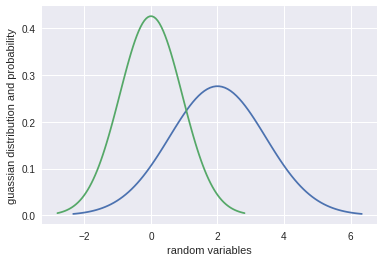

In [ ]:
plt.plot(x1,stat.norm.pdf(x1,mean1,sigma1))
plt.plot(x2,stat.norm.pdf(x2,mean2,sigma2))
plt.ylabel('guassian distribution and probability')
plt.xlabel('random variables')

plt.show()

Step 2: Decide the significance level

Choose the $\alpha$, the level of significance according to the relative importance of the risks of committing Type I and Type II errors in the problem. 

In this example, making a Type I error means that you conclude that the population mean is not 2 litres when it is 2 litres. This implies that you will take corrective action on the filling process even though the process is working well (*false alarm*).

On the other hand, when the population mean is 1.98 litres and you conclude that the population mean is 2 litres, you commit a Type II error. Here, you allow the process to continue without adjustment, even though an adjustment is needed (*missed opportunity*).

Here, we select $\alpha$ = 0.05 and n, sample size = 50.

Step 3:  Identify the test statistic

We know the population standard deviation and the sample is a large sample, n>30. So you use the normal distribution and the $Z_STAT$ test statistic.

Step 4: Calculate the critical value

We know the $\alpha$ is 0.05. So, the critical values of the $Z_{STAT}$ test statistic are -1.96 and 1.96.

In [ ]:
print(np.abs(round(stats.norm.isf(q = 0.025),2))) # Here we use alpha by 2  for two-tailed test

1.96


In [ ]:
stat.norm.ppf(0.05) # to calculate z-value based on alpha
stat.norm.cdf(-1) # to calculate p-value based on z-observed or z-statistic
stat.norm.isf(0.05) # This is kind of modulus of the z-value. Always gives positive value.

-1.6448536269514729

* Rejection region is $Z_{STAT}$ < -1.96 or $Z_{STAT}$ > 1.96
* Acceptance or non-rejection regions is -1.96 $\leq$ $Z_{STAT}$ $\leq$ 1.96

We collect the sample data, calculate the test statistic. 
In our example, 
* $\overline{X}$ = 2.001
* $\mu$   = 2
* $\sigma$ = 15
* n       = 50
* $Z_{STAT} = \frac{\overline{X} - \mu} {\frac{\sigma}{\sqrt{n}}}$ 

In [ ]:
XAvg  = 2.001
mu    = 2
sigma = 15
n     = 50
Z = (XAvg - mu)/(sigma/np.sqrt(n))
print('Value of Z observed is %2.5f' %Z)

Value of Z observed is 0.00047


5 Decide to reject or accept null hypothesis

In this example, Z = 0.00047 ( z observed) lies in the acceptance region because, 
-1.96 < Z = 0.00047 < 1.96.

Z observed is less than Z critical

So the statistical decision is not to reject the null hypothesis.

So there is no sufficient evidence  to prove that the mean fill is different from 2 litres.

#Codes

### One sample t-test
- Null hypothesis : sample mean value is same as population mean (In code as **pop mean**)
- Alternate : sample mean value is not same as population mean ( sample data point, please change and see results accrodingly)

In [ ]:
from scipy.stats import ttest_1samp   
seed(1)   
pop_mean = 2
data = 1 * randn(100) + pop_mean
print ('mean of the data = ', mean(data))
sample_data = 3 
tset, pval = ttest_1samp(data,sample_data)
print('p-value =',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" Since pvalue < alpha, we are rejecting null hypothesis")
else:
  print("Since p-value > alpha, we are accepting null hypothesis")

mean of the data =  2.0605828520756986
p-value = 6.595504187467089e-18
 Since pvalue < alpha, we are rejecting null hypothesis


### One sample one-tailed t-test
- Ho(Null Hypothesis): P1 <= P2
- Ha(Alternative Hypothesis): P1> P2 (Polulation mean (183) is greater than sample mean)

In [ ]:
# Note : scipy always gives the test statistic as signed.
# This means that given p and t values from a two-tailed test,
# One can reject the null Hypothesis of a greater-than test when p/2 < alpha and t > 0, and of a less-than test when p/2 < alpha and t < 0.
from scipy import stats
def one_sample_one_tailed(sample_data, popmean, alpha=0.05, alternative='less'): #change alternative to less or greater
    t, p = stats.ttest_1samp(sample_data, popmean)
    print ('sample mean :', mean(sample_data))
    print ('population mean :', popmean)
    print ('t:',t)
    print ('p:',p)
    if alternative == 'greater' and (p/2 < alpha) and t > 0:
        print ('Reject Null Hypothesis for greater-than test')
    if alternative == 'less' and (p/2 < alpha) and t < 0:
        print ('Reject Null Hypothesis for less-than test')
sample_data = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]        
one_sample_one_tailed(sample_data,183)  

sample mean : 177.96
population mean : 183
t: -4.349499097420766
p: 0.0018516076160135836
Reject Null Hypothesis for less-than test


### Choice of test statistics - Z Test
We can use Z test if, the sample size is > 30 , and data points are normally distributed. 

In [ ]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
seed(1)   
pop_mean = 2
data = 1 * randn(100) + pop_mean
print ('mean of the data = ', mean(data))
sample_mean = 3 #change the value and see the results

ztest ,pval = stests.ztest(x1=data, x2=None, value=sample_mean)

print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

mean of the data =  2.0605828520756986
4.5758065764700396e-26
reject null hypothesis


### Two sample t-test for significance
 

In [ ]:
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t


In [ ]:
# seed the random number generator
seed(1)
mean1 = 2 #This is sample 1 mean
mean2 = 2 #This is sample 2 mean

# generate two independent samples
data1 = 1 * randn(100) + mean1
data2 = 1 * randn(100) + mean2
# calculate the t test
alpha = 0.05
# calculate means
mean1, mean2 = mean(data1), mean(data2)
# calculate standard errors
serror1, serror2 = sem(data1), sem(data2)
# standard error on the difference between the samples
sed = sqrt(serror1**2.0 + serror2**2.0)
# calculate the t statistic
t_stat = (mean1 - mean2) / sed
# degrees of freedom
df = len(data1) + len(data2) - 2
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0

print('t=%.3f, df=%d, p=%.3f' % (t_stat, df, p))

# interpret via p-value
if p > alpha:
	print('Since P-value is greater than 0.05, Accepting null hypothesis that the means are equal.')
else:
	print('Since P-value is less than 0.05, Rejecting the null hypothesis that the means are equal.')

t=-0.714, df=198, p=0.476
Since P-value is greater than 0.05, Accepting null hypothesis that the means are equal.
